# s01: Pandas

<br>
<br>
<img src="img/pandas_logo.png" width="200px">
<br>
<br>

This is a quick introduction to Pandas.


## Objectives of this session:
   - Learn simple and some more advanced usage of pandas dataframes
   - Get a feeling for when pandas is useful and know where to find more information
   - Understand enough of pandas to be able to read its documentation.

Pandas is a Python package that provides high-performance and easy to use
data structures and data analysis tools.
This page provides a brief overview of pandas, but the open source community
developing the pandas package has also created excellent documentation and training
material, including:

- a  [Getting started guide](https://pandas.pydata.org/getting_started.html) - including tutorials and a 10 minute flash intro
- a [10 minutes to pandas tutorial](https://pandas.pydata.org/docs/user_guide/10min.html#min)
- thorough [Documentation](https://pandas.pydata.org/docs/)
- a [cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- a [cookbook](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook).

Let's get a flavor of what we can do with pandas. We will be working with an
example dataset containing the passenger list from the penguins, which is often used in Kaggle competitions and data science tutorials. First step is to load pandas:

In [1]:
import pandas as pd # pd is the standard abbreviation
import numpy as np

We can download the data from seaborn directly reading into a `DataFrame`:

In [2]:
import seaborn as sns
pengs = sns.load_dataset("penguins")

We can now view the dataframe to get an idea of what it contains and print some summary statistics of its numerical data:

In [3]:
# print the first 5 lines of the dataframe
pengs.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## What’s in a dataframe?

Clearly, pandas dataframes allows us to do advanced analysis with very few commands, but it takes a while to get used to how dataframes work so let’s get back to basics.

Series and DataFrames have a lot functionality, but how can we find out what methods are available and how they work? One way is to visit the API reference and reading through the list. Another way is to use the autocompletion feature in Jupyter and type e.g. `pengs["island"]`. in a notebook and then hit TAB twice - this should open up a list menu of available methods and attributes.

As we saw above, pandas dataframes are a powerful tool for working with tabular data. A pandas `pandas.DataFrame` is composed of rows and columns:

<br>
<img src="img/02_pd_table_dataframe.svg" width="400px">
<br>

Lets get some detailed information about the numerical data of the `df`.

In [4]:
# print summary statistics for each column
pengs.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Ok, so we have information on pengouins data. With the summary statistics we see that the body mass is 4201 g, maximum flipper length is 231 mm, etc.

Let’s say we’re interested in the mean boddy mass per species. With two one-liners, we can find the average body mass and plot corresponding histograms (`pandas.DataFrame.groupby()`, `pandas.DataFrame.hist()`):

In [5]:
print(pengs.groupby("species")["body_mass_g"].mean())

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


array([[<AxesSubplot:title={'center':'body_mass_g'}>]], dtype=object)

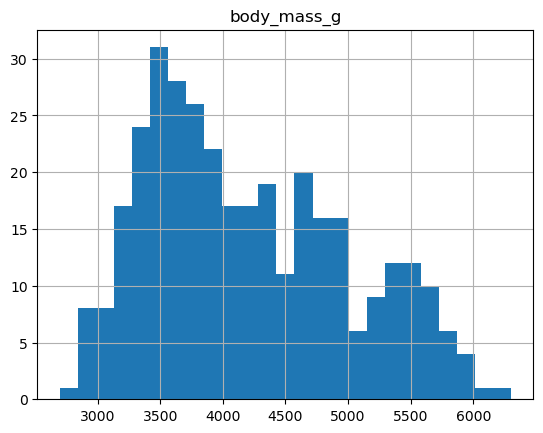

In [6]:
pengs.hist(column='body_mass_g', bins=25)

`groupby` is a powerful method which splits a dataframe and aggregates data in groups. To see what’s possible, let’s return to the pengs dataset. We start by creating a new column `child` to indicate whether a pengouin was a child or not, based on the existing `body_mass_g` column. For this example, let’s assume that you are a child when you weight less than 4500 g:

In [7]:
pengs["child"] = pengs["body_mass_g"] < 4000

Now we can test the if the flipper length is different for childs by grouping the data on `species` and then creating further sub-groups based on `child`:

In [8]:
pengs.groupby(["species", "child"])["flipper_length_mm"].mean()

species    child
Adelie     False    195.282051
           True     188.098214
Chinstrap  False    203.062500
           True     193.596154
Gentoo     False    217.262295
           True     208.000000
Name: flipper_length_mm, dtype: float64

In [9]:
<div class="alert alert-danger">
Task 2.8: How many pengouins per species live on which island? Store the answer in a new variable. (2 points).
<p> </p>
</div>

SyntaxError: invalid syntax (4148584333.py, line 1)

Each column of a dataframe is a `pandas.Series` object - a dataframe is thus a collection of series:

In [8]:
# print some information about the columns
pengs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Now we can already see what columns are present in the `df`. Any easier way jsut to display the column names is to use the function `df.columns`.

In [ ]:
pengs.columns

Unlike a NumPy array, a dataframe can combine multiple data types, such as numbers and text, but the data in each column is of the same type. So we say a column is of type `int64` or of type `object`.

Let’s inspect one column of the penguin data (first downloading and reading the datafile into a dataframe if needed, see above):

In [9]:
pengs["flipper_length_mm"]
pengs.flipper_length_mm          # same as above

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339      NaN
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 344, dtype: float64

<div class="alert alert-success">
A single column of a data frame is often refered to as a "Series". 
<p></p>
</div>

Now let us adress not just a single column, but also include the rows as well. Adressing a row with numbers is what Pandas calls the `index`:

In [12]:
pengs.index

RangeIndex(start=0, stop=344, step=1)

We saw above how to select a single column, but there are many ways of selecting (and setting) single or multiple rows, columns and values. We can refer to columns and rows either by number or by their name (`loc`, `iloc`, `at`, `iat`):

In [13]:
pengs.loc[0,"island"]          # select single value by row and column
pengs.loc[:10,"bill_length_mm":"body_mass_g"]  # slice the dataframe by row and column *names*
pengs.iloc[0:2,3:6]                      # same slice as above by row and column *numbers*

pengs.at[0,"flipper_length_mm"] = 42      # set single value by row and column *name* (fast)
pengs.at[0,"species"]           # select single value by row and column *name* (fast)
pengs.iat[0,5]                           # select same value by row and column *number* (fast)

pengs["is_animal"] = True             # set a whole column

Dataframes also support boolean indexing, just like we saw for `numpy` arrays:

In [15]:
idx_big = pengs["body_mass_g"] > 4500 
pengs[idx_big]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_animal
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,True
39,Adelie,Dream,39.8,19.1,184.0,4650.0,Male,True
45,Adelie,Dream,39.6,18.8,190.0,4600.0,Male,True
81,Adelie,Torgersen,42.9,17.6,196.0,4700.0,Male,True
101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,Male,True
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,True
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,True
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,True
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,True


Using the boolean index `idx_big`, we can select specific row from an entire `df` based on values from a single column. 

<div class="alert alert-danger">
Task 2.9: Using boolean indexing, compute the mean flipper length among pengouins over and under the average body mass. (2 points).
<p> </p>
</div>

## Tidy data

The above analysis was rather straightforward thanks to the fact that the dataset is *tidy*.

In short, columns should be variables and rows should be measurements, and adding measurements (rows) should then not require any changes to code that reads the data.

What would untidy data look like? Here’s an example from some run time statistics from a 1500 m running event:

In [16]:
runners = pd.DataFrame([
            {'Runner': 'Runner 1', 400: 64, 800: 128, 1200: 192, 1500: 240},
            {'Runner': 'Runner 2', 400: 80, 800: 160, 1200: 240, 1500: 300},
            {'Runner': 'Runner 3', 400: 96, 800: 192, 1200: 288, 1500: 360},
            ])

In [17]:
runners.head()

,Runner,400,800,1200,1500
0,Runner 1,64,128,192,240
1,Runner 2,80,160,240,300
2,Runner 3,96,192,288,360


In [18]:
runners = pd.melt(runners, id_vars="Runner",
            value_vars=[400, 800, 1200, 1500],
            var_name="distance",
            value_name="time"
            )

In [19]:
runners.head()

,Runner,distance,time
0,Runner 1,400,64
1,Runner 2,400,80
2,Runner 3,400,96
3,Runner 1,800,128
4,Runner 2,800,160


In this form it's easier to **filter**, **group**, **join** and **aggregate** the data, and it's also easier to model relationships
between variables.

The opposite of melting is to *pivot* data, which can be useful to view data in different ways as we'll see below.

For a detailed exposition of data tidying, have a look at [this article](http://vita.had.co.nz/papers/tidy-data.pdf).

## Creating dataframes from scratch

We saw above how one can read in data into a dataframe using the read_csv() function. Pandas also understands multiple other formats, for example using read_excel, read_json, etc. (and corresponding methods to write to file: to_csv, to_excel, to_json, etc.)

But sometimes you would want to create a dataframe from scratch. Also this can be done in multiple ways, for example starting with a numpy array (see [`DataFrame` docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) 

Let's create a `df` for our study and fill it with random numbers which do not make **any** sense at all.

In [23]:
import random
import string

n = 6

ids = [''.join(random.choices(string.ascii_uppercase + string.digits, k=5)) for i in range(0,n)] # this line generates IDs from Uppercase letters A-Z and Number 0-9 of length 5

nms_cols = ['age','height','MoCA']
rand_age = np.random.randint(18,99,n)
rand_height = np.random.randint(150,200,n)
rand_moca = np.random.randint(0,30,n)
df = pd.DataFrame(list(zip(rand_age, rand_height, rand_moca)), index=ids, columns=nms_cols)
df.head()

,age,height,MoCA
SAT7C,24,180,14
Z1XKG,24,153,5
7PSH5,43,173,10
PM0V5,59,161,1
TF4L1,79,177,1
